In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
import sys
import os

src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

In [5]:
from data import load_mnist_dataloaders, unpatchify

In [61]:
cache_dir = os.path.expanduser("~/experiment_data/datasets")

In [39]:
def tensor_to_str(x):
    if x.dim() == 0:
        return str(x.item())
    else:
        return ','.join(str(i.item()) for i in x)

def show_first_image(data_loader, patch_size=14):
    # Get the first batch from data_loader
    images, labels = next(iter(data_loader))

    print("Image shape: ", images[0].shape)

    plt.imshow(unpatchify(images[0]).squeeze(), cmap='gray')
    plt.title(f'Label: {tensor_to_str(labels[0])}')
    plt.axis('off')
    plt.show()

Image shape:  torch.Size([4, 196])


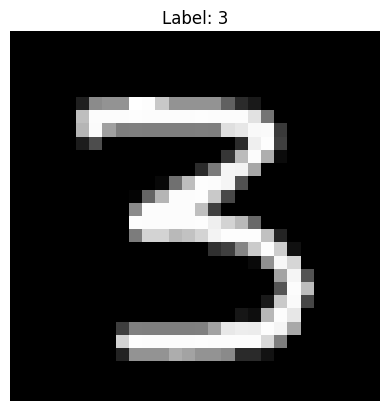

In [40]:
train_loader_image_classification, _, _ = load_mnist_dataloaders(cache_dir)
show_first_image(train_loader_image_classification)

Generating composite dataset: /Users/anton/experiment_data/datasets/MNIST/d5833fd2a1071c5cfd7909735a89a1b6.pkl


Generating composite MNIST: 100%|██████████| 10000/10000 [00:02<00:00, 3337.18it/s]


Generating composite dataset: /Users/anton/experiment_data/datasets/MNIST/d42c047e612e9d8ad30138e6816454c5.pkl


Generating composite MNIST: 100%|██████████| 2000/2000 [00:00<00:00, 3689.24it/s]


Image shape:  torch.Size([16, 196])


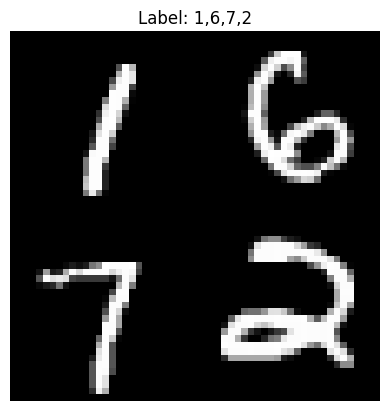

In [63]:
train_loader_composite_fixed, _, _ = load_mnist_dataloaders(
    cache_dir,
    composite_mode=True,
    canvas_size=(56, 56),
    num_digits=4,
    placement='grid'  # or 'random'
)
show_first_image(train_loader_composite_fixed)

Generating composite dataset: /Users/anton/experiment_data/datasets/MNIST/725c29bdc0522b33c1cce2f3d57d0adc.pkl


Generating composite MNIST: 100%|██████████| 10000/10000 [00:03<00:00, 2694.86it/s]


Generating composite dataset: /Users/anton/experiment_data/datasets/MNIST/b757f040f5c004dfca8e8b11094894ae.pkl


Generating composite MNIST: 100%|██████████| 2000/2000 [00:00<00:00, 2835.98it/s]


Image shape:  torch.Size([36, 196])


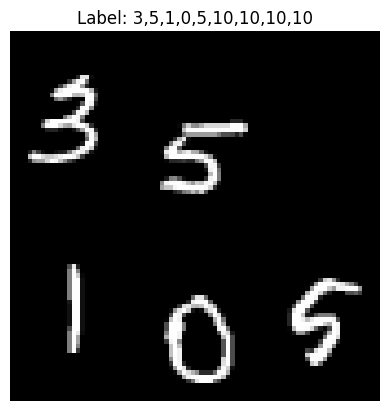

In [64]:
train_loader_composite_random, _, _ = load_mnist_dataloaders(
    cache_dir,
    composite_mode=True,
    canvas_size=(84, 84),
    num_digits_range=(5, 9),
    placement='random'
)
show_first_image(train_loader_composite_random)